In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Lets create the functions for performing the data preprocessing in the dataset 

In [2]:
def identify_categorical_columns(df):
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype.name == "object":
            categorical_columns.append(col)
    return categorical_columns

def identify_date_time_columns(df):
    date_time_columns = []
    for col in df.columns:
        if pd.api.types.is_datetime_dtype(df[col]):
            date_time_columns.append(col)
    return date_time_columns

def handle_missing_values(df):
    # Impute missing values with the mean of the column.
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    return df

def handle_duplicates(df):
    # Drop duplicate rows.
    df.drop_duplicates(inplace=True)
    return df

def handle_outliers(df, threshold=3):
    # Identify outliers using the z-score method.
    for col in df.columns:
        if df[col].dtype.name in ["float64", "int64"]:
            df_z = df[col].apply(lambda x: (x - df[col].mean()) / df[col].std())
            df_outliers = df_z[abs(df_z) > threshold]
            df.drop(df_outliers.index, inplace=True)
    return df

def normalize_data(df):
    # Normalize the data using the MinMaxScaler.
    scaler = MinMaxScaler()
    df_norm = scaler.fit_transform(df)
    df_norm = pd.DataFrame(df_norm, columns=df.columns)
    return df_norm

def encode_data(df,categoriacal_columns):
    label=LabelEncoder()
    for i in categoriacal_columns:
        df[i]=label.fit_transform(df[i])
    return df
    
def handle_data(df):
    # Identify categorical columns.
    categorical_columns = identify_categorical_columns(df)
    # Identify date and time columns.
#     date_time_columns = identify_date_time_columns(df)
    # Handle missing values.
    df = encode_data(df, categorical_columns)
    df = handle_missing_values(df)
    # Handle duplicates.
#     df = handle_duplicates(df)
    # Handle outliers.
#     df = handle_outliers(df)
    # Normalize the data.
    df = normalize_data(df)
    # Encode categorical data.
    # Handle date and time data.
#     df = handle_date_time(df, date_time_columns)
    # Handle imbalance.
#     df = handle_imbalance(df, target_column)
    return df

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

Usage
The target variable is nothing but the Grade of the milk. It can be

Target

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

Inspiration
To leverage the benefits of machine learning in the dairy industry.

In [1]:
df=(pd
   .read_csv("/kaggle/input/life-longevity-factors/LiveLongerData.csv")
   )
df.head()

NameError: name 'pd' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Factor                           35 non-null     object 
 1   Years gained / lost              35 non-null     float64
 2   strength of science?             35 non-null     object 
 3   strength of science as a number  35 non-null     int64  
 4   sexes affected                   35 non-null     object 
 5   effect                           35 non-null     object 
 6   Comment                          26 non-null     object 
 7   Note                             35 non-null     object 
 8   ID                               35 non-null     int64  
 9   Sources                          35 non-null     object 
 10  Links                            35 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.1+ KB


In [5]:
df.shape

(35, 11)

In [6]:
df.describe()

,Years gained / lost,strength of science as a number,ID
count,35.000000,35.000000,35.000000
mean,3.243143,1.771429,18.000000
std,8.126155,0.877353,10.246951
min,-25.000000,1.000000,1.000000
25%,1.070000,1.000000,9.500000
50%,3.500000,1.000000,18.000000
75%,7.750000,3.000000,26.500000
max,15.000000,3.000000,35.000000


In [7]:
X=df.drop(['effect','Sources','ID','Links','Comment','Note'],axis=1)
df1=handle_data(X)

In [8]:
X.head()

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected
0,29,-10.0,1,3,0
1,28,-3.0,2,1,0
2,31,-1.5,2,1,0
3,19,2.0,2,1,3
4,20,3.0,0,2,0


In [9]:
df1.head()

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected
0,0.852941,0.3750,0.5,1.0,0.0
1,0.823529,0.5500,1.0,0.0,0.0
2,0.911765,0.5875,1.0,0.0,0.0
3,0.558824,0.6750,1.0,0.0,0.6
4,0.588235,0.7000,0.0,0.5,0.0


##Features vs Label

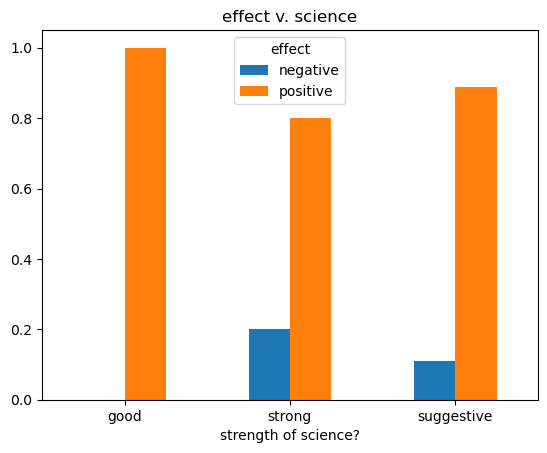

In [10]:
(df
.groupby(['strength of science?'])
.effect#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='effect v. science', rot='horizontal')
);

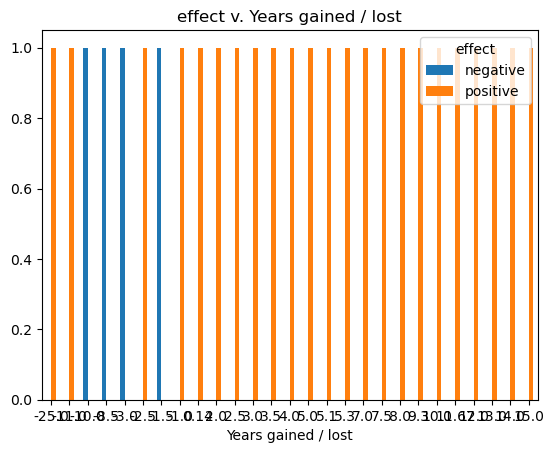

In [ ]:
(df
.groupby(['Years gained / lost'])
.effect#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='effect v. Years gained / lost', rot='horizontal')
);

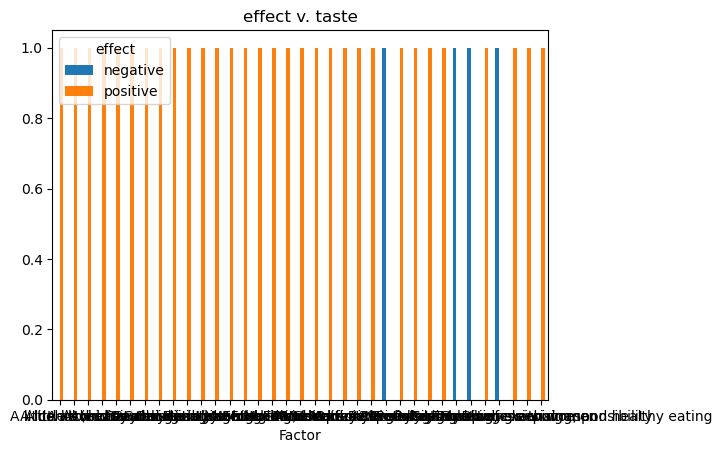

In [12]:
(df
.groupby(['Factor'])
.effect#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='effect v. taste', rot='horizontal')
);

In [13]:
(df
.groupby(['Temprature'])
.Grade#y
.value_counts(normalize=True)
.unstack()
.plot
.bar(title='grade v. Temp', rot='horizontal')
);

KeyError: 'Temprature'

In [ ]:

(df1
.corr()
.style
.background_gradient(cmap="viridis", axis=None)
)

Data Preprocessing and modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
lab=LabelEncoder()
df['effect']=lab.fit_transform(df['effect'])
df['effect'].shape
# df1.shape

In [ ]:
df.shape

In [ ]:
df1.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1,
 df['effect'],
 test_size=0.2,
random_state=42)


In [2]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        classifier.fit(X_train, Y_train)
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))